# Data: Movies 

Data are insertions of movies with details about their genres, revenuew, relase time, ranking, budgets etc. 



# Exploratory Data Analysis 

Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. 


## Import Libraries

In [50]:

import ast
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


### Load Database


Load the movie dataset and create their dataframes

In [51]:
movies_df = pd.read_csv("movies.csv")
movies_df.head()
#movies_df.sort_values(movies_df["vote_count"], ascending= True)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [52]:
movies_df.shape

(4803, 20)

### Data Cleansing

#### Identidy missing data and drop them if they are not necessary. Else use imputation method.

In [53]:
movies_df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [54]:
movies_df= movies_df.drop(columns= ["homepage", "tagline"])
#homeage and tagline columns are not required for the analysis because they don't add any value
#or movies_df.drop(["homepage", "tagline"], inplace=True, axis=1)

In [55]:
movies_df= movies_df.dropna(axis=0)

movies_df.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [56]:

#movies_df["genres"] = movies_df["genres"].apply(lambda x: pd.read_json(x)["name"])

 
#### Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'status', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [57]:
# code here
movies_df2 = movies_df.drop(columns= ['keywords', 'status', 'original_language', 'overview', 'production_companies', 'original_title'], axis=1)

movies_df2

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


In [58]:
movies_df2.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

Remove any duplicate rows

In [59]:
# It's always a agood idea to check the presenc eof duplicates after removing them 
movies_df2.drop_duplicates()
movies_df2.duplicated().sum()

0

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [60]:
#movies_df2["revenue"]
counts= movies_df2["revenue"].value_counts()
print (counts)

0            1423
7000000         6
8000000         6
6000000         5
12000000        5
             ... 
124827316       1
75505856        1
124731534       1
158733820       1
2040920         1
Name: revenue, Length: 3297, dtype: int64


In [61]:
#Drop rows with value 0 from revenue column 
movies_df2 = movies_df2.drop(movies_df2[movies_df2["revenue"] == 0].index)


In [62]:
movies_df2["revenue"].value_counts()

8000000      6
7000000      6
6000000      5
100000000    5
10000000     5
            ..
124827316    1
75505856     1
124731534    1
158733820    1
2040920      1
Name: revenue, Length: 3296, dtype: int64

In [63]:
counts_budget = movies_df2["budget"].value_counts()
print(counts_budget)

0           147
20000000    126
25000000    115
30000000    114
40000000    111
           ... 
92620000      1
14600000      1
14800000      1
14500000      1
220000        1
Name: budget, Length: 386, dtype: int64


In [64]:
movies_df2 = movies_df2.drop(movies_df2[movies_df2["budget"] == 0].index)

In [65]:
movies_df2["budget"].value_counts()

20000000    126
25000000    115
30000000    114
40000000    111
15000000    107
           ... 
92620000      1
14600000      1
14800000      1
14500000      1
220000        1
Name: budget, Length: 385, dtype: int64

To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [66]:
# Change the release_date column to DateTime column
movies_df2 = movies_df2.rename(columns= {"release_date":"DateTime"})
movies_df2

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",2292,19.748658,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Clerks,7.4,755
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,4.553644,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pink Flamingos,6.2,110
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Cure,7.4,63
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658


In [67]:
# Extract the release year from every release date
movies_df2["Year"] = movies_df2["DateTime"].str.split("-").str[0]
movies_df2

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,Year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",2292,19.748658,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Clerks,7.4,755,1994
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,4.553644,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pink Flamingos,6.2,110,1972
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Cure,7.4,63,1997
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658,2004


Change budget and revenue columns format to integer using numpy’s int64 method.

In [68]:
movies_df2["budget"] = movies_df2["budget"].astype(np.int64)
movies_df2["revenue"] = movies_df2["revenue"].astype(np.int64)


In [69]:
movies_df2["budget"].dtype
movies_df2["revenue"].dtype

dtype('int64')

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [70]:

#Testing1
#def parse_col_json(column, key):
#    """
#    Args:
#        column: string
#            name of the column to be processed.
#        key: string
#            name of the dictionary key which needs to be extracted
#    """
#    for index, i in zip(movies_df2.index, movies_df2[column]):
#        list1 = []
#        try:
#            data = json.loads(i)
#            for j in range(len(data)):
#                list1.append(data[j][key])
#        except (json.JSONDecodeError, TypeError):
#            # Handle cases where JSON data is invalid or missing
#            list1 = []
#        movies_df2.loc[index, column] = str(list1)
#
#parse_col_json('genres', 'name')
#parse_col_json('spoken_languages', 'name')
#parse_col_json('production_countries', 'name')
#
#movies_df2.head()
#

In [71]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df2.index,movies_df2[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df2.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

movies_df2.head()

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,Year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

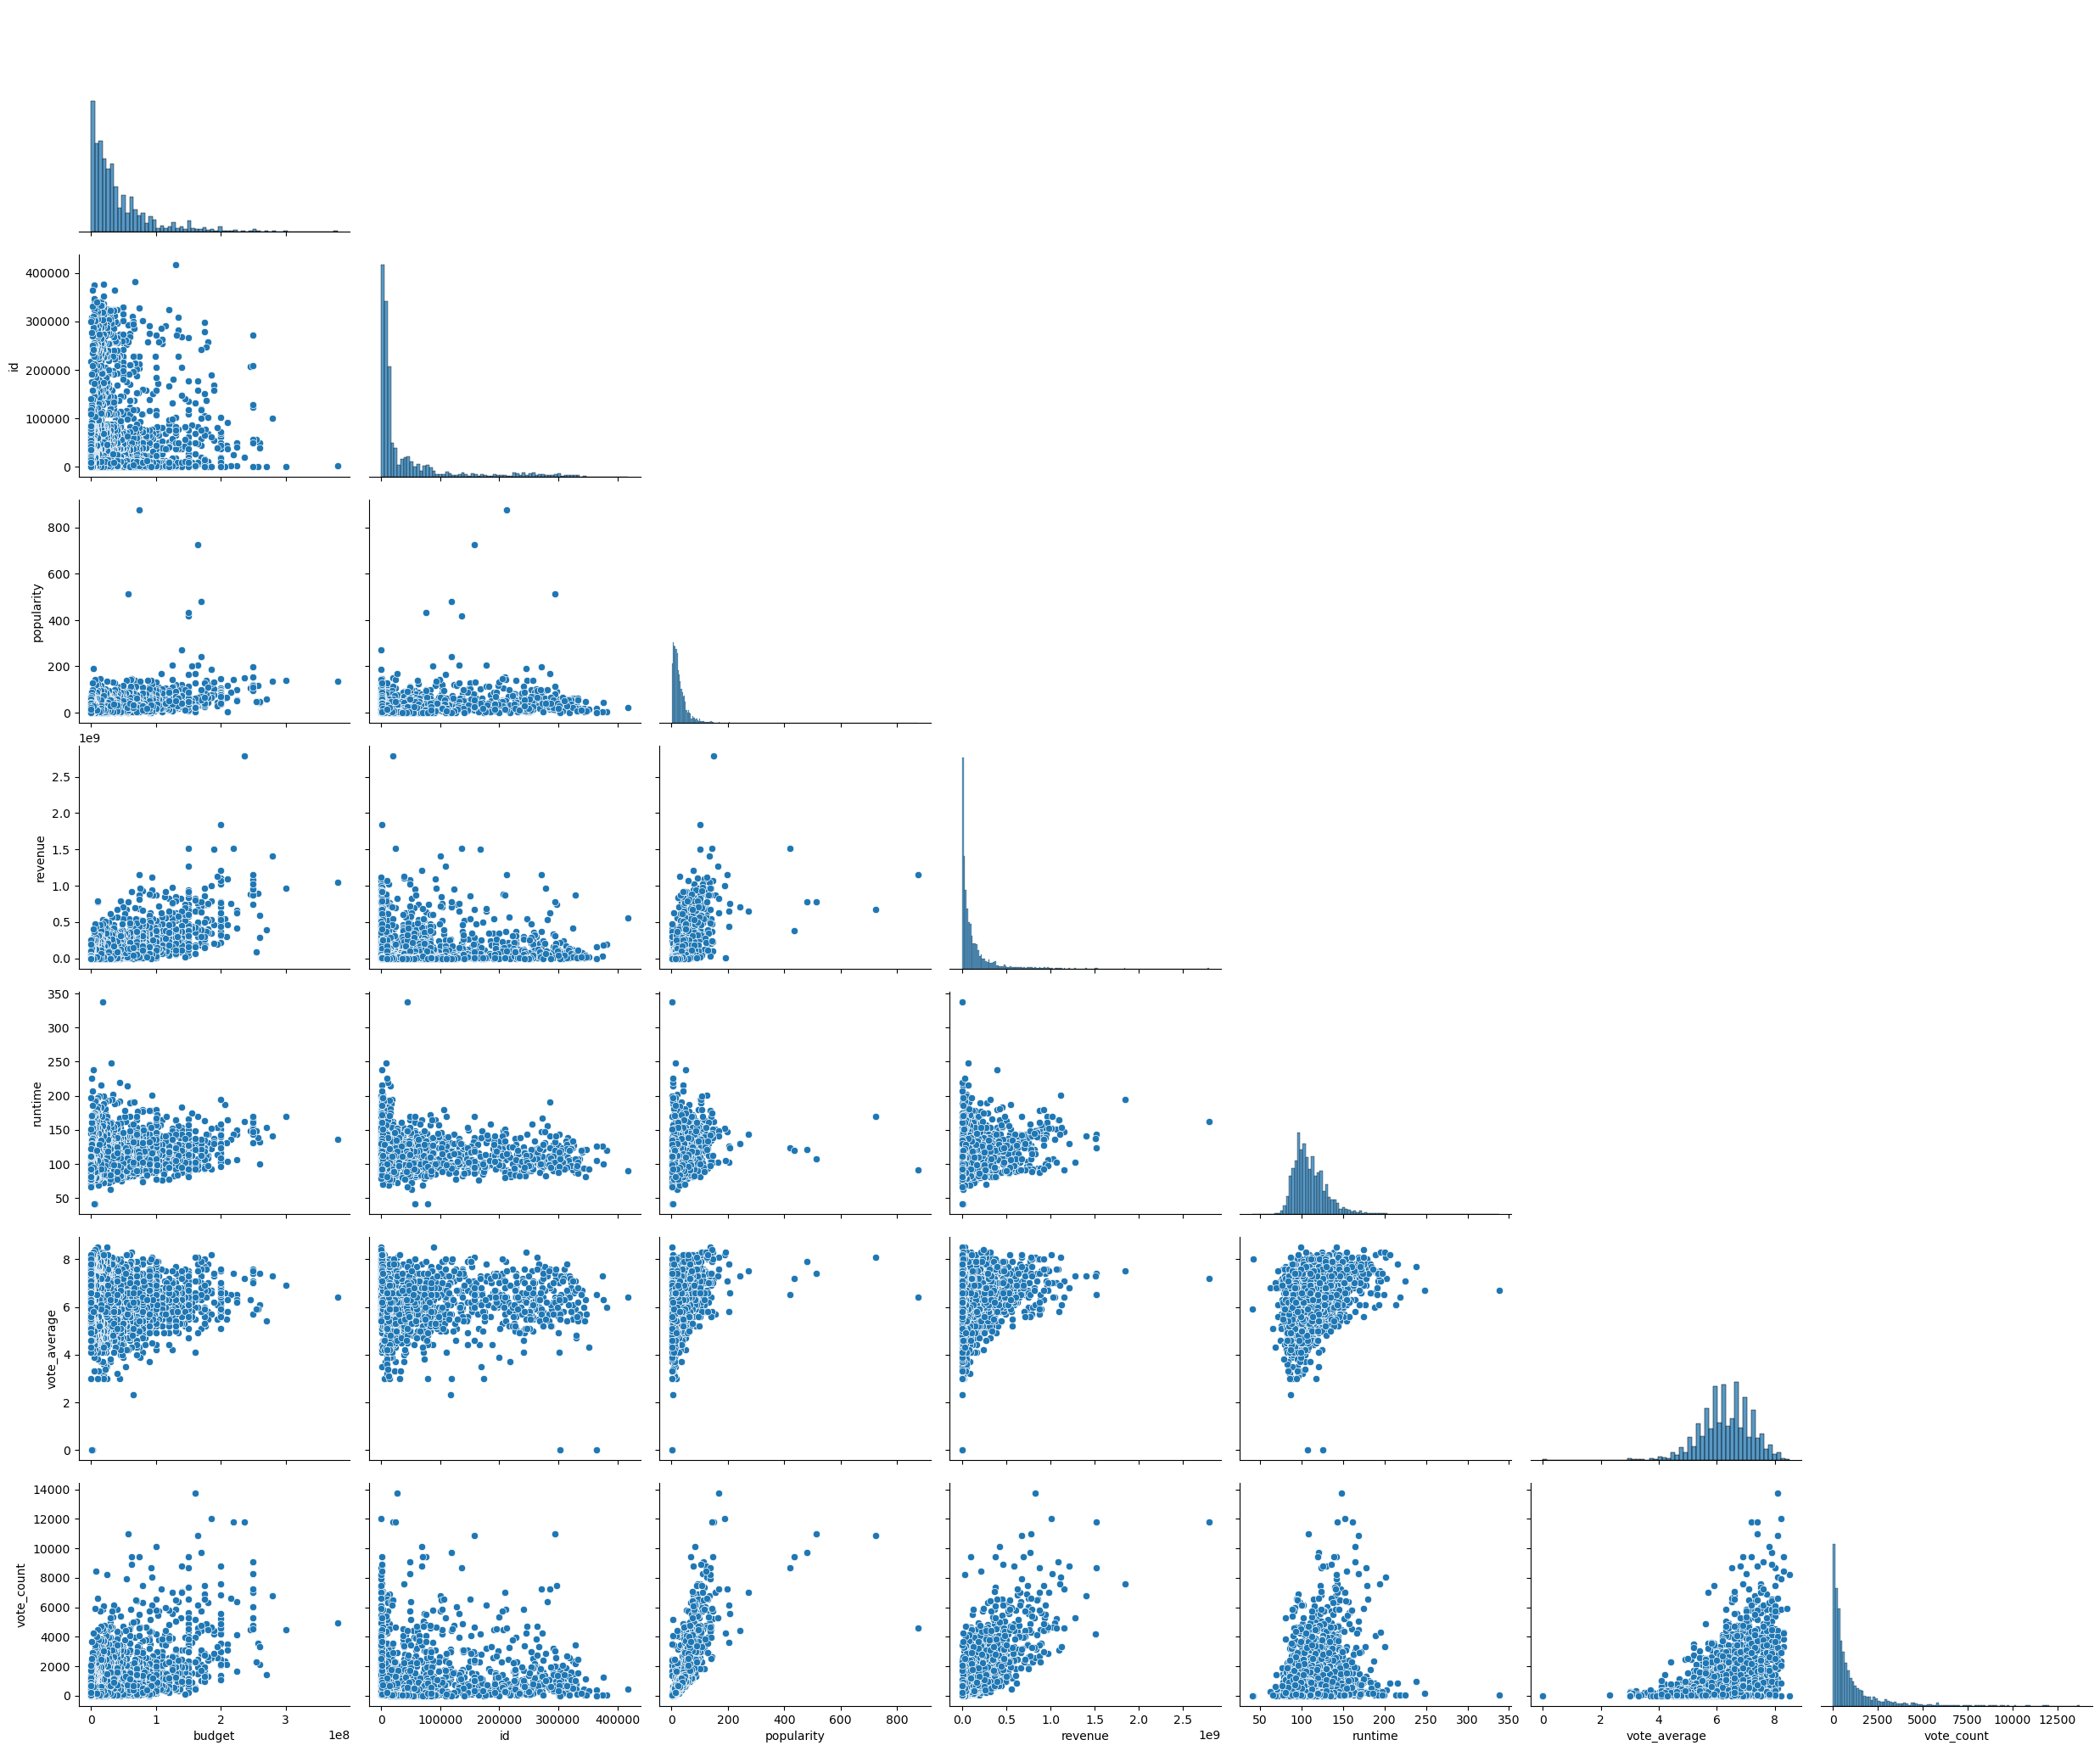

In [78]:

#Pairplot: showing the relationships between each numeric feature
sns.pairplot(movies_df2, diag_kind = "hist", height = 3, aspect = 1.2, corner = True)


Initial observations:


* Runrime and vore_average follow a normal distribution whereas vote count, the rest are skewed to the left ( not normal distribution).
* Movies with duration between 100-160 min are more likely to be seen from the audience, thus they have more vote counts.


#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [91]:
Expenssive_movies = movies_df2.sort_values(["budget"],ascending=False).head(5)
Expenssive_movies[["budget", "title", "revenue"]]


,budget,title,revenue
17,380000000,Pirates of the Caribbean: On Stranger Tides,1045713802
1,300000000,Pirates of the Caribbean: At World's End,961000000
7,280000000,Avengers: Age of Ultron,1405403694
10,270000000,Superman Returns,391081192
4,260000000,John Carter,284139100


In [94]:
Expenssive_movies["actual_revenue"] = Expenssive_movies["revenue"] - Expenssive_movies["budget"]  
Expenssive_movies["actual_revenue"]
Expenssive_movies[["budget", "title", "revenue", "actual_revenue"]]


,budget,title,revenue,actual_revenue
17,380000000,Pirates of the Caribbean: On Stranger Tides,1045713802,665713802
1,300000000,Pirates of the Caribbean: At World's End,961000000,661000000
7,280000000,Avengers: Age of Ultron,1405403694,1125403694
10,270000000,Superman Returns,391081192,121081192
4,260000000,John Carter,284139100,24139100


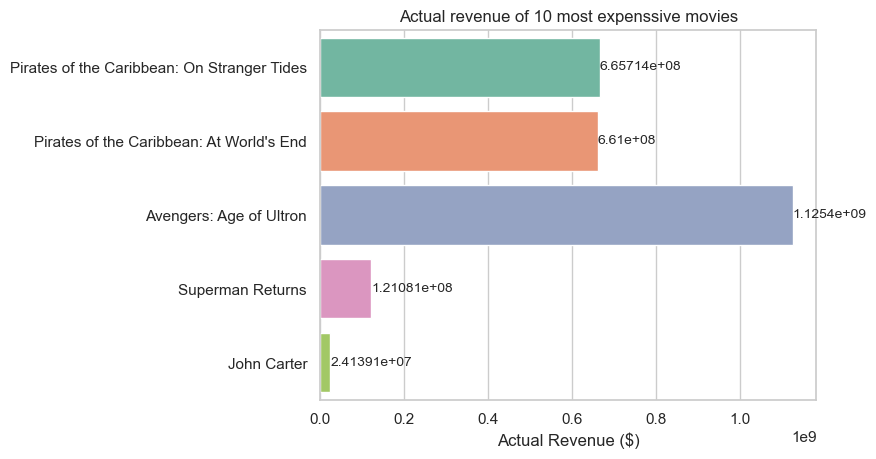

In [366]:
five_most_expenssive = Expenssive_movies["title"].head(5)
five_most_expenssive

#Set grid behine graph
sns.set(style = "whitegrid")

#Create the barplot figure
figure1 = sns.barplot(data = Expenssive_movies, 
            y= five_most_expenssive, 
            x= Expenssive_movies["actual_revenue"], 
            hue_order= Expenssive_movies["actual_revenue"],
            palette= "Set2",
            
            )
#Add title
figure1.set_title("Actual revenue of 10 most expenssive movies")

# Rotate x-axis labels by 45 degrees
#figure1.set_xticklabels(figure1.get_xticklabels(), rotation=45, ha="right")

#Add exact values for each bas:
figure1.bar_label(figure1.containers[0], fontsize=10)

# Add exact values for each bar
#for p in figure1.patches:
#    figure1.annotate(f"${int(p.get_width()):,}", (p.get_width(), p.get_y() + p.get_height() / 2),
#                    ha='center', va='center', fontsize=10, color='black')


# Remove x-axis labels
#figure1.set(xticklabels=[])

#Remove y axis
figure1.set(ylabel="")

#Change x axis
figure1.set(xlabel="Actual Revenue ($)")

#Show plot
plt.show()

#Save figure
## Save the figure as a .png image
#plt.savefig("figure2.png")


* The top most expenssive movies had a positive actual revenue with the highest the Avengers:Age of Ulton movie. 
* However, the John Carter movie could have used a lower budget to increase it's actual revenue, since it had the lowest actual revenue from the 5 movies

In [142]:
#compares 5 most expenssive with 5 most cheapest movies

Cheapest_movies = movies_df2.sort_values(["budget"],ascending=True).head(5)
Cheapest_movies[["budget", "title", "revenue"]]
Cheapest_movies["actual_revenue"] = Cheapest_movies["revenue"]-Cheapest_movies["budget"]
Cheapest_movies[["budget", "title", "revenue", "actual_revenue"]]


,budget,title,revenue,actual_revenue
4238,1,Modern Times,8500000,8499999
3611,4,A Farewell to Arms,25,21
3372,7,Split Second,5,-2
3419,7,Bran Nue Dae,7,0
4608,8,The Prophecy,16,8


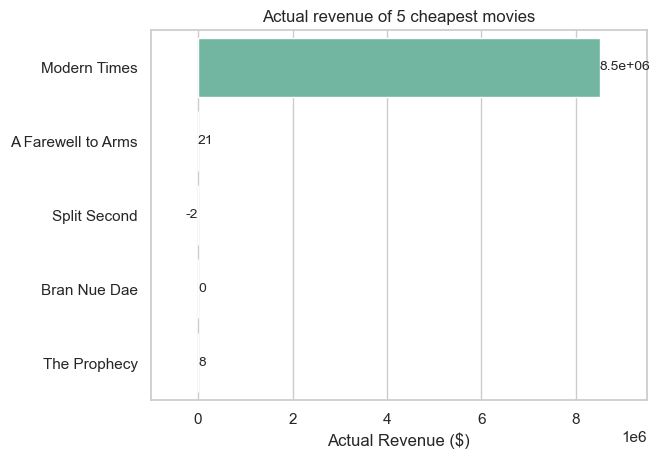

In [152]:
#Set grid behine graph
sns.set(style = "whitegrid")

#Create the barplot figure
figure2 = sns.barplot(data = Cheapest_movies, 
            y= Cheapest_movies["title"], 
            x= Cheapest_movies["actual_revenue"], 
            hue_order= Cheapest_movies["actual_revenue"],
            palette= "Set2",
            
            )
#Add title
figure2.set_title("Actual revenue of 5 cheapest movies")

#Add exact values for each bas:
figure2.bar_label(figure2.containers[0], fontsize=10)

#Remove y axis
figure2.set(ylabel="")

#Change x axis
figure2.set(xlabel="Actual Revenue ($)")

# Set x-axis limits to prevent negative values from exiting the graph
plt.xlim(-1e6, Cheapest_movies["actual_revenue"].max() + 1e6)  # Adjust the upper limit as needed


#Show plot
plt.show()

* Definitely, it was worth spending the money for the most expenssive movies comparing witht he cheastest ones
* Movies with higher budget tend to have higher actual revenue


In [ ]:
#Create a new figure with two subplots arranged side by side
fig, axes = plt.subplots(2, 1, figsize=(8, 10))  # 2 row, 1 columns

# Create the first boxplot on the first subplot
figure1 = sns.barplot(data = Expenssive_movies, 
            y= five_most_expenssive, 
            x= Expenssive_movies["actual_revenue"], 
            hue_order= Expenssive_movies["actual_revenue"],
            palette= "Set2", ax= axes[0]
             )
#Add title
figure1.set_title("Actual revenue of 5 most expenssive movies")

# Rotate x-axis labels by 45 degrees
#figure1.set_xticklabels(figure1.get_xticklabels(), rotation=45, ha="right")

#Add exact values for each bas:
figure1.bar_label(figure1.containers[0], fontsize=10)

#Remove y axis
figure1.set(ylabel="")

#Change x axis
figure1.set(xlabel="Actual Revenue ($)")

# Create the first boxplot on the second subplot
figure2 = sns.barplot(data = Cheapest_movies, 
            y= Cheapest_movies["title"], 
            x= Cheapest_movies["actual_revenue"], 
            hue_order= Cheapest_movies["actual_revenue"],
            palette= "Set2", ax= axes[1]
            )
#Add title
figure2.set_title("Actual revenue of 5 cheapest movies")

#Add exact values for each bas:
figure2.bar_label(figure2.containers[0], fontsize=10)

#Remove y axis
figure2.set(ylabel="")

#Change x axis
figure2.set(xlabel="Actual Revenue ($)")

# Set x-axis limits to prevent negative values from exiting the graph
plt.xlim(-1e6, Cheapest_movies["actual_revenue"].max() + 1e6)  # Adjust the upper limit as needed

# Adjust spacing between subplots
plt.tight_layout()

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [289]:

movies_df2["Profit"] = movies_df2["revenue"]-movies_df2["budget"]
Profitable_movies = movies_df2.sort_values(["Profit"], ascending=False)
Profitable_movies[["Profit", "title", "popularity", "vote_average", "vote_count", "Year"]]
#5 most and list profitable movies showed bu=y profit and title

,Profit,title,popularity,vote_average,vote_count,Year
0,2550965087,Avatar,150.437577,7.2,11800,2009
25,1645034188,Titanic,100.025899,7.5,7562,1997
28,1363528810,Jurassic World,418.708552,6.5,8662,2015
44,1316249360,Furious 7,102.322217,7.3,4176,2015
16,1299557910,The Avengers,144.448633,7.4,11776,2012
...,...,...,...,...,...,...
311,-92896027,The Adventures of Pluto Nash,12.092241,4.4,142,2002
208,-98301101,The 13th Warrior,27.220157,6.4,510,1999
141,-111007242,Mars Needs Moms,12.362599,5.5,199,2011
338,-119180039,The Alamo,10.660441,5.8,106,2004


* Most profitable movies had higher popularity
* More people watched those movies, and voted for them, with a higher vote_average for the most profitable movies

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [187]:
Most_talked = movies_df2.sort_values(["popularity"], ascending= False)
Most_talked[["popularity", "Profit", "vote_average","vote_count", "title"]].head(20)

,popularity,Profit,vote_average,vote_count,title
546,875.581305,1082730962,6.4,4571,Minions
95,724.247784,510120017,8.1,10867,Interstellar
788,514.569956,725112979,7.4,10995,Deadpool
94,481.098624,603328629,7.9,9742,Guardians of the Galaxy
127,434.278564,228858340,7.2,9427,Mad Max: Fury Road
28,418.708552,1363528810,6.5,8662,Jurassic World
199,271.972889,515011224,7.5,6985,Pirates of the Caribbean: The Curse of the Bla...
82,243.791743,540644566,7.3,4410,Dawn of the Planet of the Apes
200,206.227151,627100229,6.6,5584,The Hunger Games: Mockingjay - Part 1
88,203.734590,487105443,7.8,6135,Big Hero 6


* Most popular movies: "Minions", "Interstellar", "Deadpool", "Guardians of the Galaxy", "Mad Max: Fury Road"
* The most popular have high numbers of votes (vote_count), except "Minions" which might be inncluded in the outliers

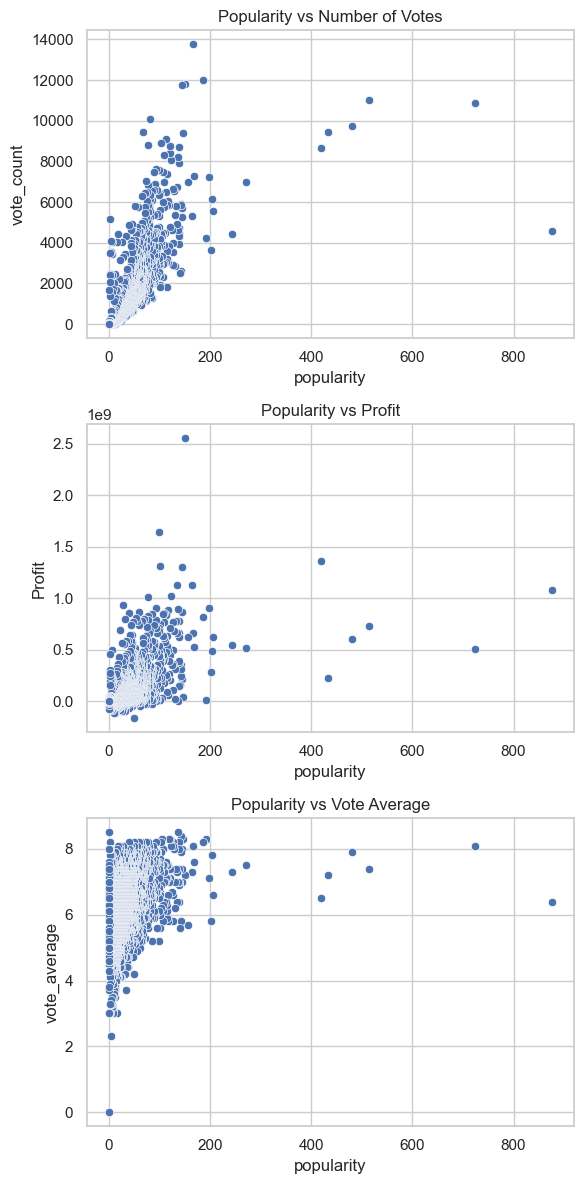

In [194]:
fig, axes = plt.subplots(3, 1, figsize=(6, 12))  # 3 rows, 1 column

# Create the second boxplot on the first plot
sns.scatterplot(data=Most_talked,
            x= Most_talked["popularity"],
            y=Most_talked["vote_count"],
            ax=axes[0]
            )
axes[0].set_title("Popularity vs Number of Votes")

# Create the second boxplot on the second plot
sns.scatterplot(data=Most_talked,
            x= Most_talked["popularity"],
            y=Most_talked["Profit"],
            ax=axes[1]
            )
axes[1].set_title("Popularity vs Profit")

# Create the second boxplot on the third plot
sns.scatterplot(data=Most_talked,
            x= Most_talked["popularity"],
            y=Most_talked["vote_average"],
            ax=axes[2]
            )
axes[2].set_title("Popularity vs Vote Average")

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a .png image
#plt.savefig("boxplots.png")

# Show the plot
plt.show()

#### Find Movies which are rated above 7



In [205]:
Most_rated = movies_df2[movies_df2["vote_average"]>7]
Most_rated.sort_values(["vote_average"], ascending= False)[["title","vote_average", "Profit"]].head(10)




,title,vote_average,Profit
1881,The Shawshank Redemption,8.5,3341469
2970,There Goes My Baby,8.5,-10376491
3337,The Godfather,8.4,239066411
1818,Schindler's List,8.3,299365567
3232,Pulp Fiction,8.3,205928762
3865,Whiplash,8.3,9792000
2731,The Godfather: Part II,8.3,34542841
662,Fight Club,8.3,37853753
2294,Spirited Away,8.3,259925095
4535,Seven Samurai,8.2,-1728159


In [204]:
Most_rated.shape


(637, 14)

* There are 637 movies rated above 7, however some of the hihgest rated movies had no negative profit values
* That means that the budget exited the revenue of those movies 


In [219]:
# Find all mosr_rated movies that had negative profit
Most_rated_noo_profit = Most_rated[Most_rated["Profit"] < 0]

Most_rated_noo_profit.shape #There are 61 movies rated above 7 that had no profit

(61, 14)

In [220]:
# Find all mosr_rated movies that had negative profit
Most_rated_noo_profit = Most_rated[Most_rated["Profit"] < 0]



Most_rated_noo_profit.sort_values(["Profit"], ascending= False)[["title", "vote_average", "Profit", "popularity"]].head(10)

,title,vote_average,Profit,popularity
4641,I Married a Strange Person!,7.5,-47,0.293649
1294,Serenity,7.4,-130536,45.388937
4370,Brigham City,7.3,-147794,0.280083
3937,Happiness,7.4,-192610,10.757539
2790,True Romance,7.5,-218449,35.268557
4381,The Act of Killing,7.5,-555425,8.887411
4106,No End in Sight,7.2,-568377,2.283796
2797,Lars and the Real Girl,7.1,-706337,15.817096
4461,The Mudge Boy,7.3,-737148,5.292536
3380,We Need to Talk About Kevin,7.4,-961058,21.276864


In [246]:
Most_rated_with_profit = Most_rated[Most_rated["Profit"] > 0]
Most_rated_with_profit.sort_values(["Profit"], ascending= False)[["title", "vote_average", "Profit", "popularity"]].head(10)

,title,vote_average,Profit,popularity
0,Avatar,7.2,2550965087,150.437577
25,Titanic,7.5,1645034188,100.025899
44,Furious 7,7.3,1316249360,102.322217
16,The Avengers,7.4,1299557910,144.448633
7,Avengers: Age of Ultron,7.3,1125403694,134.279229
124,Frozen,7.3,1124219009,165.125366
329,The Lord of the Rings: The Return of the King,8.1,1024888979,123.630332
26,Captain America: Civil War,7.1,903304495,198.372395
42,Toy Story 3,7.6,866969703,59.995418
675,Jurassic Park,7.6,857100000,40.413191


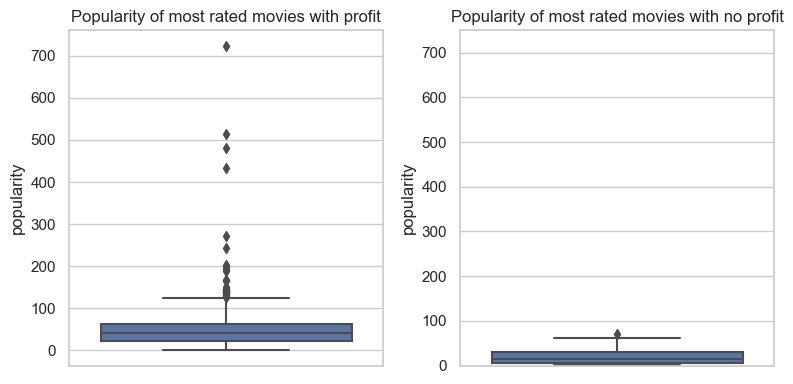

In [251]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 rows, 2 column

# Create the second boxplot on the first plot
sns.boxplot(data=Most_rated_with_profit,
            y= Most_rated_with_profit["popularity"],
            ax=axes[0]
            )
axes[0].set_title("Popularity of most rated movies with profit")


# Create the second boxplot on the second plot
sns.boxplot(data=Most_rated_noo_profit,
            y= Most_rated_noo_profit["popularity"],
            ax=axes[1]
            )
axes[1].set_title("Popularity of most rated movies with no profit")
plt.ylim(0, 750)  # Adjust the upper limit as needed


# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a .png image
#plt.savefig("boxplots.png")

# Show the plot
plt.show()

* It worth removing the outliers to see more clearer the differences
* However we might loose valuable information about the movies

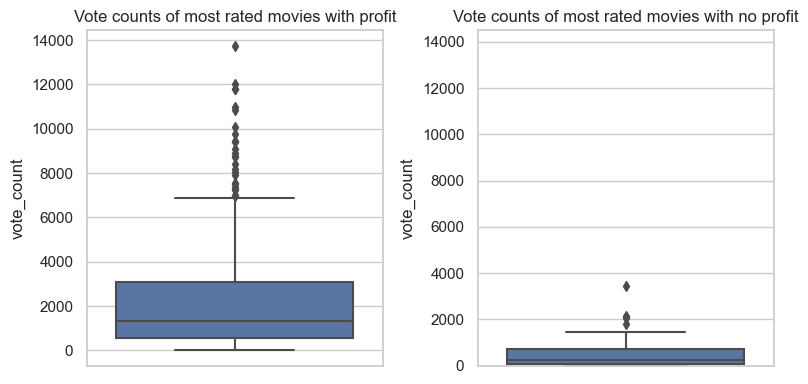

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 rows, 2 column

# Create the second boxplot on the first plot
sns.boxplot(data=Most_rated_with_profit,
            y= Most_rated_with_profit["vote_count"],
            ax=axes[0]
            )
axes[0].set_title("Vote counts of most rated movies with profit")


# Create the second boxplot on the second plot
sns.boxplot(data=Most_rated_noo_profit,
            y= Most_rated_noo_profit["vote_count"],
            ax=axes[1]
            )
axes[1].set_title("Vote counts of most rated movies with no profit")
plt.ylim(0, 14500)  # Adjust the upper limit as needed


# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a .png image
#plt.savefig("boxplots.png")

# Show the plot
plt.show()

* Most rated movies with no profits have definitly less vote counts, but most of those people voted above 7
* This observation matches the populartiy, movies rated above 7 with no profits were less popular than the most rated with profit


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [290]:
#Profitable_movies.sort_values(Profitable_movies["Profit"])[["Profit", "Year"]]
Profitable_movies[["Profit", "Year"]].head(20)

,Profit,Year
0,2550965087,2009
25,1645034188,1997
28,1363528810,2015
44,1316249360,2015
16,1299557910,2012
7,1125403694,2015
124,1124219009,2013
546,1082730962,2015
329,1024888979,2003
31,1015439994,2013


In [286]:
# Calculate the total profit for each year  - With reset index we make sure that we have a datafram as before
yearly_profit = movies_df2.groupby('Year')['Profit'].sum().reset_index()
yearly_profit


,Year,Profit
0,1916,8008844
1,1925,21755000
2,1927,-91969578
3,1929,3979000
4,1930,4050000
...,...,...
84,2012,16665370551
85,2013,15191240622
86,2014,17029736072
87,2015,16082841939


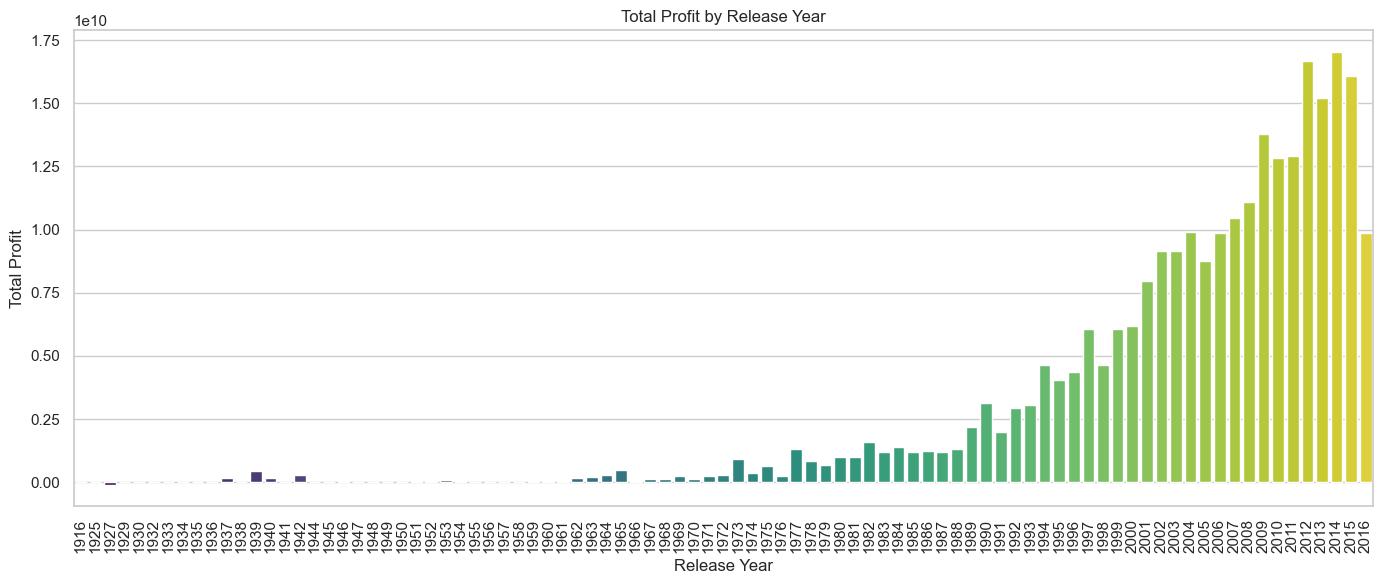

In [288]:
#plot the above relationship to evaluate which year had the most and least profit
# Set the grid background style
sns.set(style="whitegrid")

# Create a barplot to visualize yearly profits
plt.figure(figsize=(14, 6) ) # Adjust the figure size as needed
sns.barplot(data=yearly_profit, x='Year', y='Profit', palette='viridis')

# Add title and labels
plt.title("Total Profit by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Total Profit")

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

* From 1990 until 2015 profit is ascending with minor flactuation.
* Probably this is correlated with the history of cinema, internet and the movies_industries that started developing from 1990.
* The drop in 2016 might be:
    * The number of movies with negative profit that underesatimate the sum of 2016 movies 
    * Not all 2016 movies from the Jan - Dec have been taken into account in this database (unfinished movie list in 2016) 
    * Something happened during 2016 and we had a drop of total profit 

In [293]:
#To check the 1st assumption we can create a dataframe with only positive profit to eliminate the underestimation of the sum by the moving having negative profit 
yearly_profit_positive = movies_df2[movies_df2['Profit']> 0]
yearly_profit_positive = yearly_profit_positive.groupby('Year')['Profit'].sum().reset_index()
yearly_profit_positive

,Year,Profit
0,1916,8008844
1,1925,21755000
2,1929,3979000
3,1930,4050000
4,1932,21
...,...,...
83,2012,16961217623
84,2013,15827985515
85,2014,17258545977
86,2015,16416663768


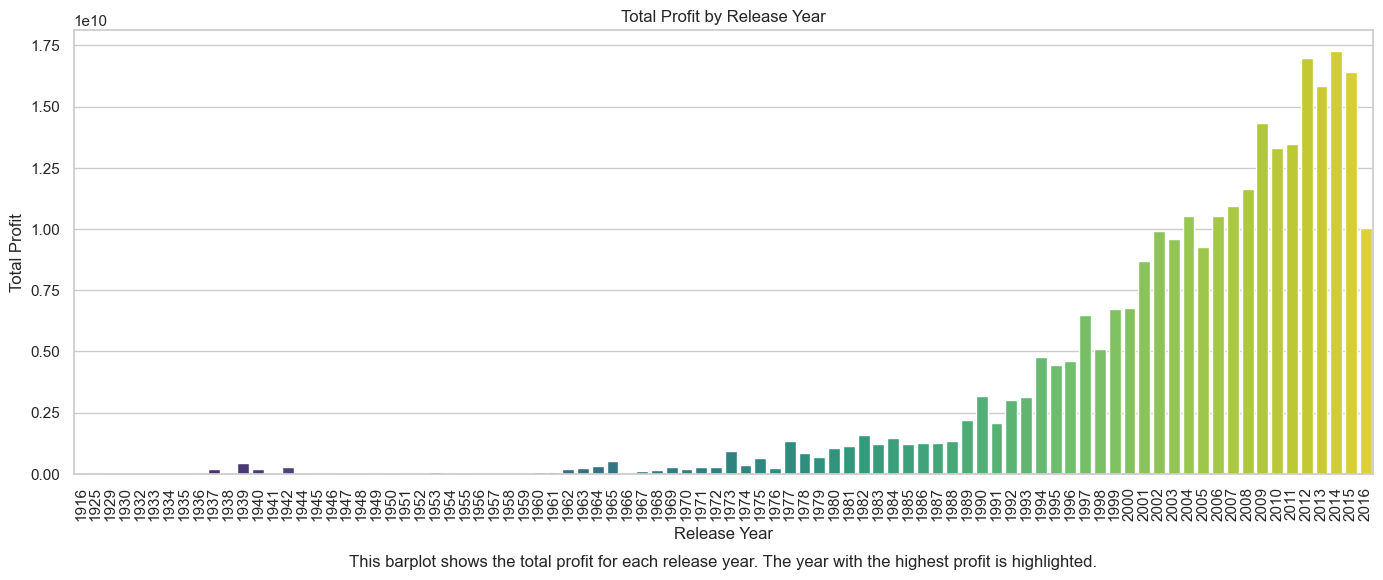

In [297]:
#plot the above relationship to evaluate which year had the most and least profit from positive profit movies
# Set the grid background style
sns.set(style="whitegrid")

# Create a barplot to visualize yearly profits
plt.figure(figsize=(14, 6) ) # Adjust the figure size as needed
sns.barplot(data=yearly_profit_positive, x='Year', y='Profit', palette='viridis')

# Add title and labels
plt.title("Total Profit by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Total Profit")

# Add a figure description below the graph
description = "This barplot shows the total profit for each release year. The year with the highest profit is highlighted."
plt.text(0.5, -0.2, description, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

* Negative profits  play a minor role in the yearly total profit
* The drop in 2016 might be:
    * Not all 2016 movies from the Jan - Dec have been taken into account in this database (unfinished movie list in 2016) 
    * Something happened during 2016 and we had a drop of total profit 

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [350]:
# Frequency of genres  - With reset index we make sure that we have a datafram as before
Genres_classification = movies_df2['genres'].reset_index()
Genres_classification.head(30)

,index,genres
0,0,"['Action', 'Adventure', 'Fantasy', 'Science Fi..."
1,1,"['Adventure', 'Fantasy', 'Action']"
2,2,"['Action', 'Adventure', 'Crime']"
3,3,"['Action', 'Crime', 'Drama', 'Thriller']"
4,4,"['Action', 'Adventure', 'Science Fiction']"
5,5,"['Fantasy', 'Action', 'Adventure']"
6,6,"['Animation', 'Family']"
7,7,"['Action', 'Adventure', 'Science Fiction']"
8,8,"['Adventure', 'Fantasy', 'Family']"
9,9,"['Action', 'Adventure', 'Fantasy']"


In [351]:
# Convert the 'genres' column to a list of genres
Genres_classification['genres'] = Genres_classification['genres'].apply(lambda x: ast.literal_eval(x))

# Get a list of all unique genres
unique_genres = set(genre for row in Genres_classification['genres'] for genre in row)

# Create a new column for each genre and set values based on genre presence
for genre in unique_genres:
    Genres_classification[genre] = Genres_classification['genres'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'genres' column if needed
df = Genres_classification.drop('genres', axis=1)

# Display the resulting DataFrame
df

,index,Romance,Science Fiction,Western,Documentary,Thriller,Drama,War,Family,Music,Animation,Foreign,Horror,Fantasy,Adventure,Crime,Mystery,Action,History,Comedy
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,4773,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3225,4788,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3226,4792,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3227,4796,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


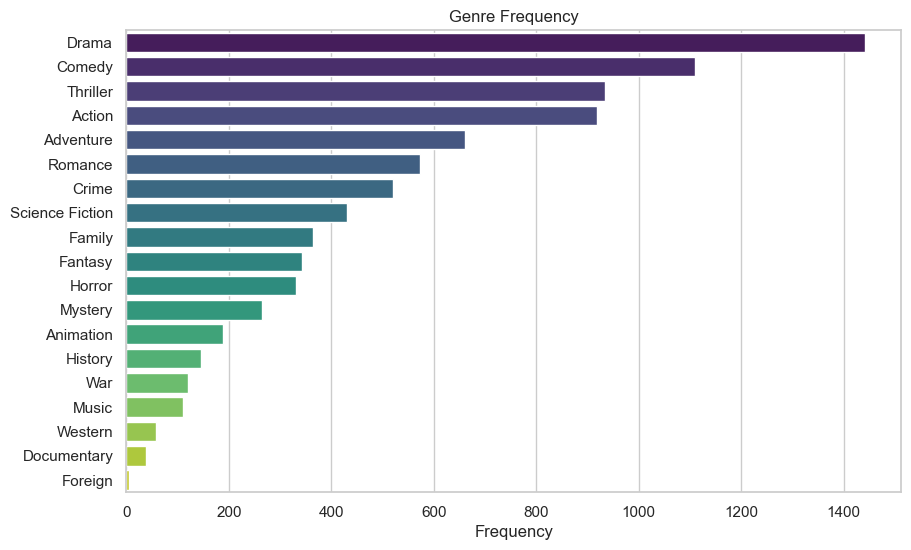

In [357]:
# Calculate the frequency of genres (count of '1' in each column)
#summing the values if each genre column
genre_frequency = df.iloc[:, 1:].sum()

# Sort the genres by frequency in descending order
genre_frequency = genre_frequency.sort_values(ascending=False)


# Create a bar plot to visualize genre frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_frequency.values, 
            y=genre_frequency.index, 
            palette="viridis",
            )
plt.xlabel("Frequency")
plt.title("Genre Frequency")
plt.show()
        
        







* Most frequent genre count for Drama, followed by Comedy, Thriller, Action ad Adveture.
* Least most frequent is Foreign, Documentary, Western adn Music.

In [369]:
df

,index,Romance,Science Fiction,Western,Documentary,Thriller,Drama,War,Family,Music,Animation,Foreign,Horror,Fantasy,Adventure,Crime,Mystery,Action,History,Comedy
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,4773,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3225,4788,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3226,4792,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3227,4796,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [373]:
#concatenated_df = pd.concat(df, movies_df2["Profit"], axis=1)
df2 = movies_df2["Profit"].reset_index()
df2

,index,Profit
0,0,2550965087
1,1,661000000
2,2,635674609
3,3,834939099
4,4,24139100
...,...,...
3224,4773,3124130
3225,4788,5988000
3226,4792,79000
3227,4796,417760


In [376]:
df["Profit"] = df2["Profit"]
 

,index,Romance,Science Fiction,Western,Documentary,Thriller,Drama,War,Family,Music,...,Foreign,Horror,Fantasy,Adventure,Crime,Mystery,Action,History,Comedy,Profit
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,2550965087
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,661000000
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,635674609
3,3,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,834939099
4,4,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,4773,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3124130
3225,4788,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,5988000
3226,4792,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,79000
3227,4796,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,417760


In [377]:
genre_profit = df.iloc[:, 1:-1].multiply(df['Profit'], axis=0)
genre_profit['TotalProfit'] = genre_profit.sum(axis=1)


In [378]:
genre_profit

,Romance,Science Fiction,Western,Documentary,Thriller,Drama,War,Family,Music,Animation,Foreign,Horror,Fantasy,Adventure,Crime,Mystery,Action,History,Comedy,TotalProfit
0,0,2550965087,0,0,0,0,0,0,0,0,0,0,2550965087,2550965087,0,0,2550965087,0,0,10203860348
1,0,0,0,0,0,0,0,0,0,0,0,0,661000000,661000000,0,0,661000000,0,0,1983000000
2,0,0,0,0,0,0,0,0,0,0,0,0,0,635674609,635674609,0,635674609,0,0,1907023827
3,0,0,0,0,834939099,834939099,0,0,0,0,0,0,0,0,834939099,0,834939099,0,0,3339756396
4,0,24139100,0,0,0,0,0,0,0,0,0,0,0,24139100,0,0,24139100,0,0,72417300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3124130,3124130
3225,0,0,0,0,0,0,0,0,0,0,0,5988000,0,0,5988000,0,0,0,5988000,17964000
3226,0,0,0,0,79000,0,0,0,0,0,0,79000,0,0,79000,79000,0,0,0,316000
3227,0,417760,0,0,417760,417760,0,0,0,0,0,0,0,0,0,0,0,0,0,1253280


In [382]:
genre_profit_frequency = genre_profit.iloc[:, 1:-1].sum()
genre_profit_frequency

Science Fiction     54287373304
Western              1726576018
Documentary           775513862
Thriller            64733558825
Drama               74850273481
War                  7175299142
Family              57519662846
Music                6115435314
Animation           37241042418
Foreign               -11249243
Horror              15660304371
Fantasy             55635024529
Adventure          112842055285
Crime               27690011985
Mystery             16776651385
Action             105041561757
History              5823549205
Comedy              80279539976
dtype: int64

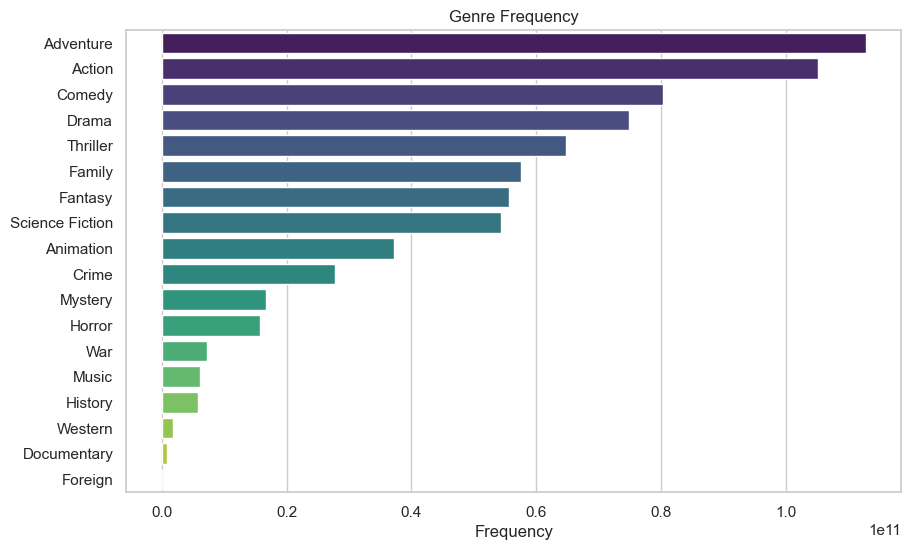

In [383]:
# Sort the genres by frequency in descending order
genre_profit_frequency = genre_profit_frequency.sort_values(ascending=False)


# Create a bar plot to visualize genre frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_profit_frequency.values, 
            y=genre_profit_frequency.index, 
            palette="viridis",
            )
plt.xlabel("Frequency")
plt.title("Total profit per Genre")
plt.show()
        
        

* Most profitable movies are listed with genres "Action, Adventure, Comedy and Drama"

## Conclusion

* The top most expenssive movies had a positive actual revenue with the highest the Avengers:Age of Ulton movie. 
* Movies with higher budget tend to have higher actual revenue
* Most popular movies: "Minions", "Interstellar", "Deadpool", "Guardians of the Galaxy", "Mad Max: Fury Road"
* The most popular have high numbers of votes (vote_count), except "Minions" which might be inncluded in the outliers
* Most rated movies with no profits have definitly less vote counts, but most of those people voted above 7
* This observation matches the populartiy, movies rated above 7 with no profits were less popular than the most rated with profit
* From 1990 until 2015 profit is ascending with minor flactuation.
* Probably this is correlated with the history of cinema, internet and the movies_industries that started developing from 1990.
* The drop in 2016 might be:
    * Not all 2016 movies from the Jan - Dec have been taken into account in this database (unfinished movie list in 2016) 
    * Something happened during 2016 and we had a drop of total profit 
* Most profitable movies are listed with genres "Action, Adventure, Comedy and Drama" so it's worh investing more in moving that can be distributed in those genres